### Training and Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

***Load Dataset***

In [2]:
df_train_original = pd.read_csv('../data/train.csv')
df_train = df_train_original.copy()
df_train.head()

C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\4057449523.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original = pd.read_csv('../data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
print('Train Data Size : ',df_train.shape)
print(df_train.columns)
#Check Train dataset
df_train.info()

Train Data Size :  (100000, 28)
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 no

***Observation***
- There are missing values present in dataset.
- Train dataset has both numerical and string values.

In [4]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [5]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,17273.83,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


***Observations***

- Customer_ID has 12500 unique values. It means we have data of 12500 customers.
- Month has only 8 unique values. Better to analyse further which months are present.
- Age has 1788 unique values. This looks strange as general age range is from 0-100.
- SSN has 12501 unique values, whereas Customer_ID only has only 12500 unique values. There is a possibility that incorrect SSN value is entered for one of the customer as same person can't have multiple SSN.

In [6]:
# HELPER FUNCTIONS

def get_column_details(df,column):
    print("Details of",column,"column")
    
    #DataType of column
    print("\nDataType: ",df[column].dtype)
    
    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())
    
def fill_missing_with_group_mode(df, groupby, column):      
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())
    
    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(mode_per_group)
    
    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())
#Method to clean categorical field

def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    
    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    #For each Customer_ID, assign same value for the column
    fill_missing_with_group_mode(df,groupby,column)
    
# Handle Outliers and null values
from scipy import stats
import numpy as np

def fix_inconsistent_values(df, groupby, column):      
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')   
    
    # --- FIXED SECTION START ---
    # 1. Filter NaNs and Group
    # 2. Calculate mode for each group and extract the actual numeric value immediately
    #    Note: keepdims=True ensures compatibility with newer SciPy versions
    mode_values = df[df[column].notna()].groupby(groupby)[column].apply(
        lambda x: stats.mode(x, keepdims=True).mode[0]
    )
    
    # 3. Get min and max from the clean series of mode values
    mini = mode_values.min()
    maxi = mode_values.max()
    # --- FIXED SECTION END ---

    # assign Wrong Values to NaN
    col = df[column].apply(lambda x: np.nan if ((x < mini) | (x > maxi) | (x < 0)) else x)

    # fill with local mode
    # Note: Added safely checks for empty modes
    mode_by_group = df.groupby(groupby)[column].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan
    )
    
    df[column] = col.fillna(mode_by_group)
    df[column].fillna(df[column].mean(), inplace=True)

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n') 
    print("\nNo. of Unique values after Cleaning:", df[column].nunique())
    print("\nNo. of Null values after Cleaning:", df[column].isnull().sum())

# def fix_inconsistent_values(df, groupby, column):      
#     print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')   
    
#     df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
#     x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
#     mini, maxi = x[0][0], y[0][0]

#     # assign Wrong Values to NaN
#     col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)|(x<0)) else x)

#     # fill with local mode
#     mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
#     df[column] = col.fillna(mode_by_group)
#     df[column].fillna(df[column].mean(),inplace=True)

#     print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n') 
#     print("\nNo. of Unique values after Cleaning:",df[column].nunique())
#     print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())
    
#Method to clean Numerical Field
def clean_numerical_field(df,groupby,column,strip=None,datatype=None,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    
    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
        
    # Remove trailing & leading special characters
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_inconsistent_values(df, groupby, column)
    
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()
    
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()
    
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep" 
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

### Categorical Features

***CREDIT SCORE***

There are 3 different Credit Score - Standard, Good & Poor.
Distribution of credit score -

a) Standard - 53%

b) Poor - 29%

c) Good - 17%

There are no null values for Credit Score.

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

-----------------------------------------------------

Credit Score Distribution


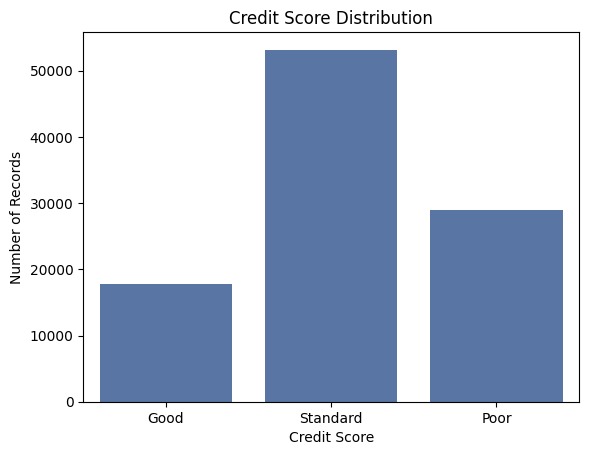

In [7]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

In [8]:
#Get Details
get_column_details(df_train,'ID')

#Get Details 
get_column_details(df_train,'Customer_ID')

#Check if same customer can have different credit score
df_train.groupby(['Customer_ID'])['Credit_Score'].nunique()

Details of ID column

DataType:  object

There are no null values

Number of Unique Values:  100000

Distribution of column:

ID
0x1602     1
0x1603     1
0x1604     1
0x1605     1
0x1606     1
          ..
0x25fe9    1
0x25fea    1
0x25feb    1
0x25fec    1
0x25fed    1
Name: count, Length: 100000, dtype: int64
Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

Customer_ID
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
CUS_0x1cdb    8
             ..
CUS_0x372c    8
CUS_0xf16     8
CUS_0xaf61    8
CUS_0x8600    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

***MONTH COLUMN***

* In the training dataset, we have credit score for each customer over the course of 8 months(from January to August).
* Converted Month column from object to datetime value so that it can be further use for model building.
* Distribution of Credit_Scrore across different months is similar.

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

-----------------------------------------------------

Month & Credit_Score Distribution


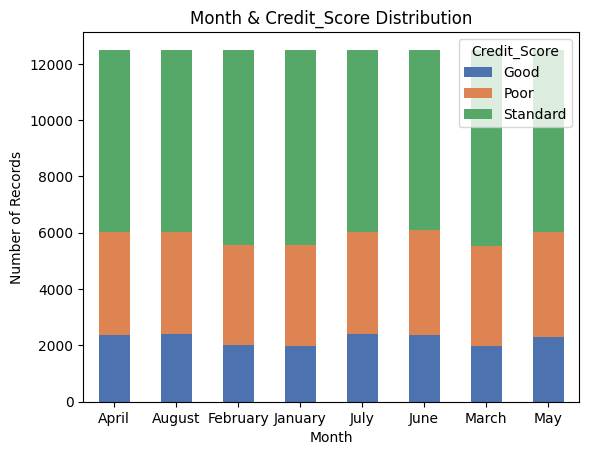

In [9]:
column_name = 'Month'

#Get Details
get_column_details(df_train,column_name)

#Plot Distrbution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score')

In [10]:
#Convert Month to datetime object
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

***NAME COLUMN***

There are 9985 null values.
Cleaning Step - Assign same Name value to each Customer_ID

In [11]:
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name)

Details of Name column

DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Distribution of column:

Name
Stevex                44
Langep                44
Vaughanl              39
Jessicad              39
Deepa Seetharamanm    38
                      ..
Bavierq                4
Alina Selyukhg         4
Janeman Latulf         4
Lucye                  4
Timothyl               3
Name: count, Length: 10139, dtype: int64

-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 9985

No. of missing values after filling with group mode: 0


***SSN***

* There are 12501 unique SSN values in training dataset.
* 5572 entries has random/garbage value as SSN value
* Steps to Clean SSN
* * Replace garbage value with np.nan
* * Assign same SSN value for each customer ID

In [12]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  12501

Distribution of column:

SSN
#F%$D@*&8      5572
864-24-3672       8
094-81-5856       8
647-67-8889       8
425-47-6723       8
               ... 
604-62-6133       4
331-28-1921       4
838-33-4811       4
856-06-6147       4
753-72-2651       4
Name: count, Length: 12501, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan

No. of missing values before filling with group mode: 5572

No. of missing values after filling with group mode: 0


***Occupation***

- There are 16 unique Occupation values.
- 7062 records are marked with garbage value.
- Steps to Clean Occupation -
-- i. Replace garbage value with np.nan
-- ii. Assign same Occupation value for each customer ID
- Distribution of Credit_Scrore across different occupation is similar.

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Occupation & Credit_Score Distribution


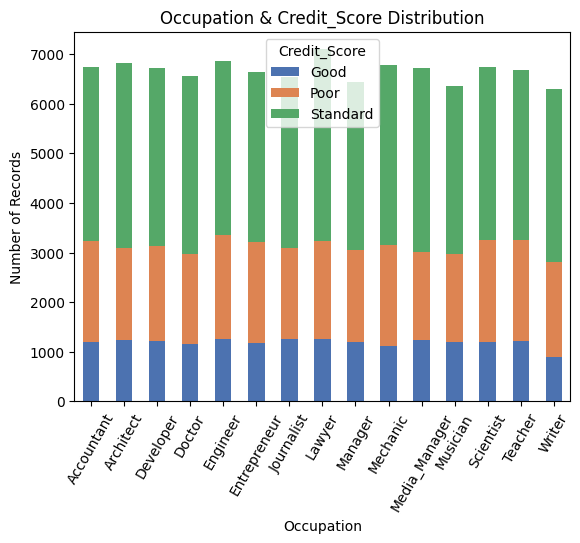

In [13]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

***Type of Loan***

- There are 6260 unique values present for Type of Loan and there are null values present.
- Mapped all null values to Not Specificed for Type of Loan column.

In [14]:
#Get Details of Type of Loan column
get_column_details(df_train,'Type_of_Loan')

#Handle Type of Loan null values
df_train['Type_of_Loan'].replace([np.nan], 'Not Specified', inplace=True)

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Type_of_Loan
Not Specified                                                                                        1408
Credit-Builder Loan                                                                                  1280
Personal Loan                                                                                        1272
Debt Consolidation Loan                                                                              1264
Student Loan                                                                                         1240
                                                                                                     ... 
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan       8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                         8


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\884462746.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Type_of_Loan'].replace([np.nan], 'Not Specified', inplace=True)


***Credit Mix***

* There are 3 types of Credit Mix - Standard, Good, Bad
* About 20k records of Credit Mix is marked as a garbage value (_).
* Steps to Clean Credit Mix Field -
* i. Replace garbage value with np.nan
* ii. Assign same Credit Mix value for each customer ID

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 20195

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Credit_Mix & Credit_Score Distribution


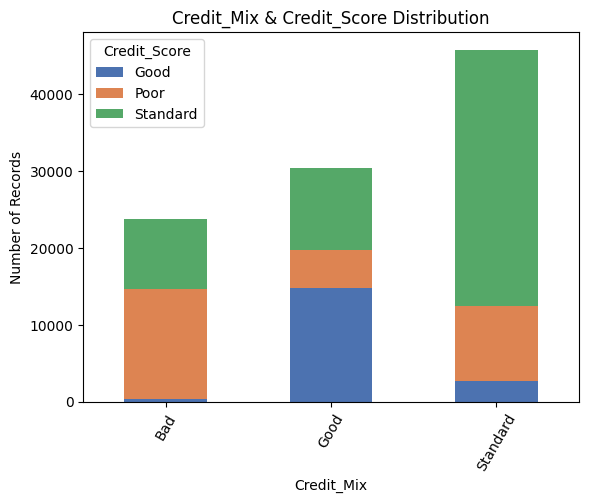

In [15]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

***Payment of Min Amount***

- There are 3 unique values present - Yes, No & NM.
- No missing values are present.

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

-----------------------------------------------------

Payment_of_Min_Amount & Credit_Score Distribution


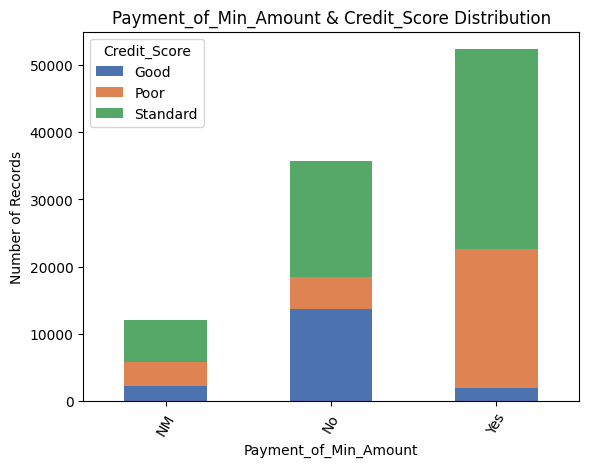

In [16]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df_train,column_name)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

***Payment Behaviour***

* There are 6 unique values of Payment Behaviour -

Low_spent_Small_value_payments, 
High_spent_Medium_value_payments, 
Low_spent_Medium_value_payments, 
High_spent_Large_value_payments, 
High_spent_Small_value_payments, 
Low_spent_Large_value_payments,

* Amount 27% of records are for Low_spent_Small_value_payments
* For 7.6k records, Payment Behaviour is filled with garbage value
* Steps to Clean Payment Behaviour Field -
* i. Replace garbage value with np.nan
* ii. Assign same Payment Behaviour value f***or each customer ID***

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Payment_Behaviour & Credit_Score Distribution


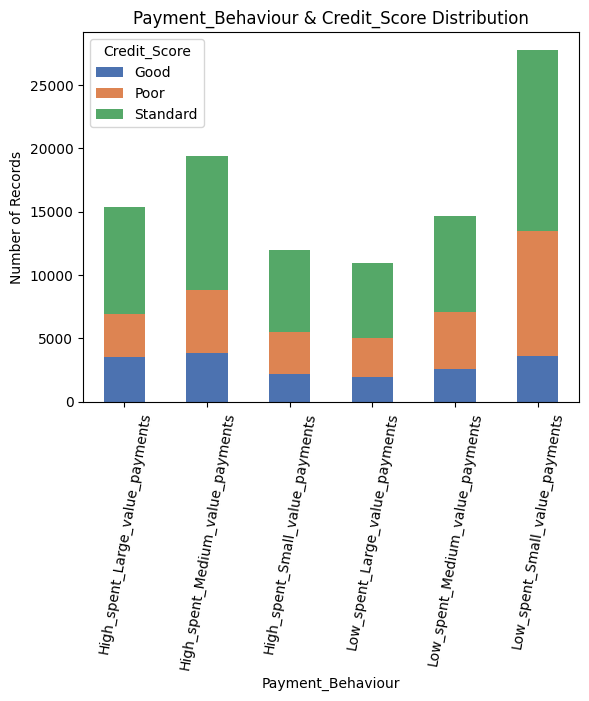

In [17]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=80)

### Numerical Values

***Cleaning Steps***

* Remove Trailing & Leading speical characters.
* Convert datatype from object to int/float if required.
* Replace null values & outliers with mode value when group by Customer_ID

***Age***

* There are 1788 unique values of Age and it is stored as an object. Having 1788 distinct values of Age mean that there is a lot of dirty data.
* After cleaning up Age value, 43 distinct Age remains.

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
6618       1
3155       1
5063       1
2875       1
4347       1
Name: count, Length: 1788, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Age is changed to int

Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min    14.0
max    56.0
Name: Age, dtype: float64

No. of Unique values after Cleaning: 43

No. of Null values after Cleaning: 0

-----------------------------------------------------

Age Distribution


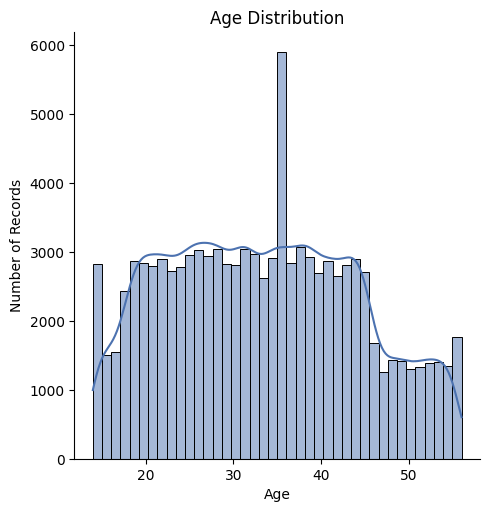

In [18]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='int')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=40)

***Annual Income***

* Annual Income has no null values.
* Most customers have a low Annual income. Distribution is right skewed.

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18940

Distribution of column:

Annual_Income
17273.83      16
20867.67      16
36585.12      16
9141.63       15
95596.35      15
              ..
48706.1_       1
108484.38_     1
14855994.0     1
54392.16_      1
34081.38_      1
Name: count, Length: 18940, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Annual_Income is changed to float

Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min      7005.93
max    179987.28
Name: Annual_Income, dtype: float64

No. of Unique values after Cleaning: 12488

No. of Null values after Cleaning: 0

-----------------------------------------------------

Annual Income Distribution


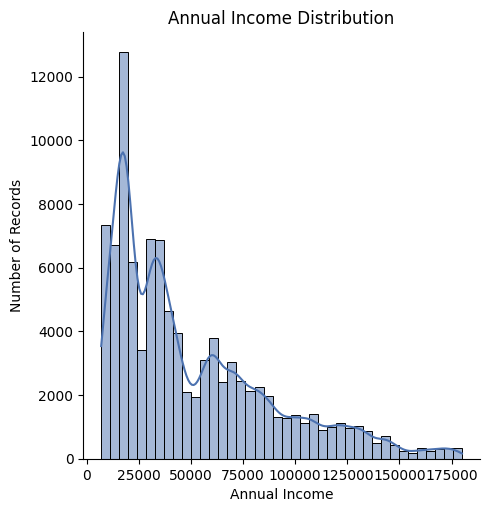

In [19]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=40)

***Monthly Inhand Salary***

* There are null values present.
* No outliers were present for Monthly Income Salary.
* Most customers have a low monthly income. Distribution is right skewed.

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  15002  null values

Number of Unique Values:  13235

Distribution of column:

Monthly_Inhand_Salary
6769.130000    15
6082.187500    15
6358.956667    15
2295.058333    15
3080.555000    14
               ..
3415.781667     1
6272.739429     1
1069.950000     1
454.382083      1
2319.831269     1
Name: count, Length: 13235, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

No. of Unique values after Cleaning: 13235

No. of Null values after Cleaning: 0

-----------------------------------------------------

Monthly Inhand Salary Distribution


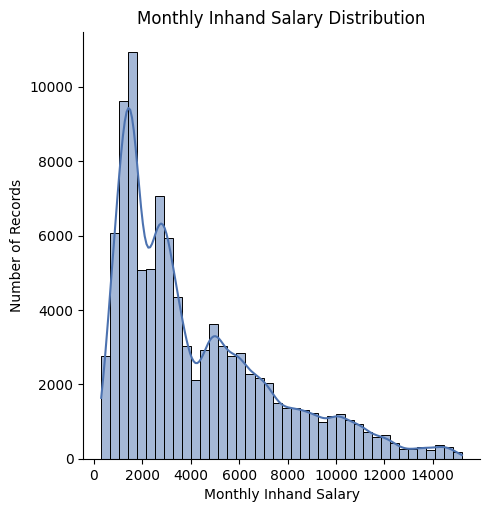

In [20]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=40)

***Num Bank Accounts***

* There are some outliers,negative values in Num Bank Accounts
* After cleaning, there are 11 possible value of this field - Num Bank Accounts ranging from 0 to 10.
* Majority of customers has no. of bank accounts between 3 to 8.

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  943

Distribution of column:

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1091        1
1123        1
1657        1
299         1
1240        1
Name: count, Length: 943, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min    -1.0
max    10.0
Name: Num_Bank_Accounts, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Bank Accounts Distribution


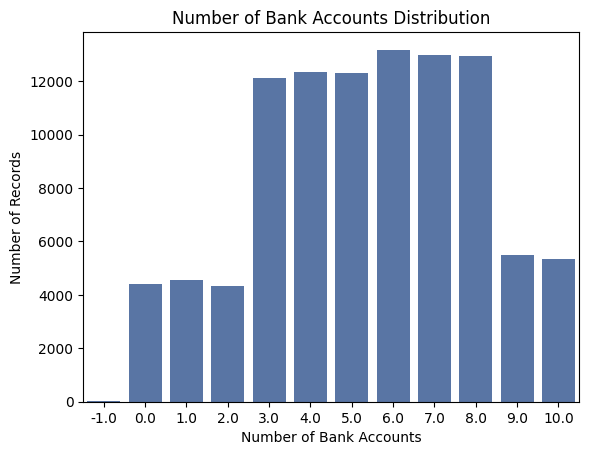

In [21]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

***Num Credit Cards***

* There are outliers present in the field as there are 1179 unique values of number of credit card.
* After removing outliers, number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5.

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1179

Distribution of column:

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
1405        1
708         1
62          1
343         1
481         1
Name: count, Length: 1179, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min     0.0
max    11.0
Name: Num_Credit_Card, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Card Distribution


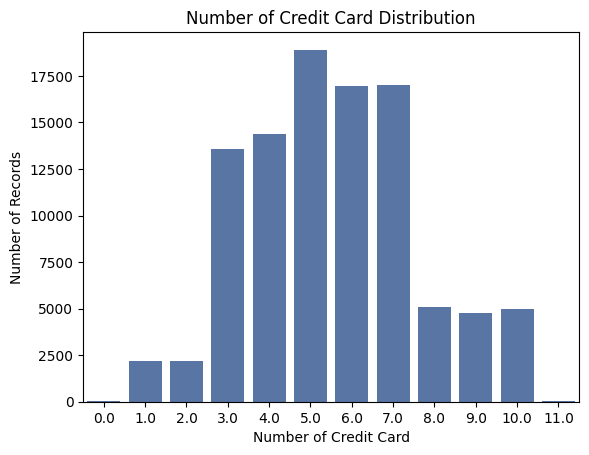

In [22]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name)

***Interest Rate***

- There were outliers present, after cleaning them up, interest rate ranges from 1% to 34%

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1750

Distribution of column:

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
3085       1
159        1
375        1
3177       1
3032       1
Name: count, Length: 1750, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       1
max    5797
Name: Interest_Rate, dtype: int64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min     1.0
max    34.0
Name: Interest_Rate, dtype: float64

No. of Unique values after Cleaning: 34

No. of Null values after Cleaning: 0

-----------------------------------------------------

Interest Rate Distribution


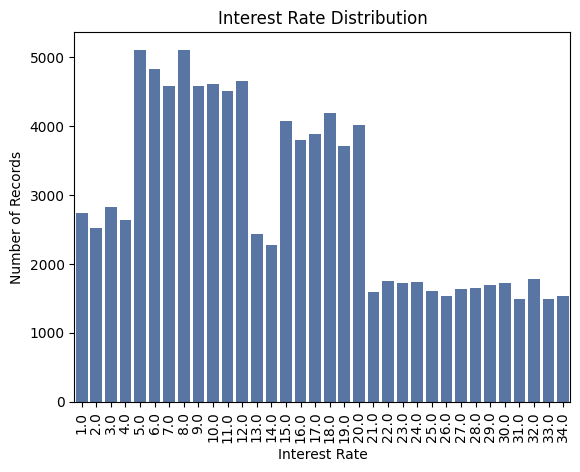

In [23]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

***Delay from Due Date***

* Delay from due date is concentrated between 0 to 30 days.

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min    -5.0
max    62.0
Name: Delay_from_due_date, dtype: float64

No. of Unique values after Cleaning: 68

No. of Null values after Cleaning: 0

-----------------------------------------------------

Delay from Due Date Distribution


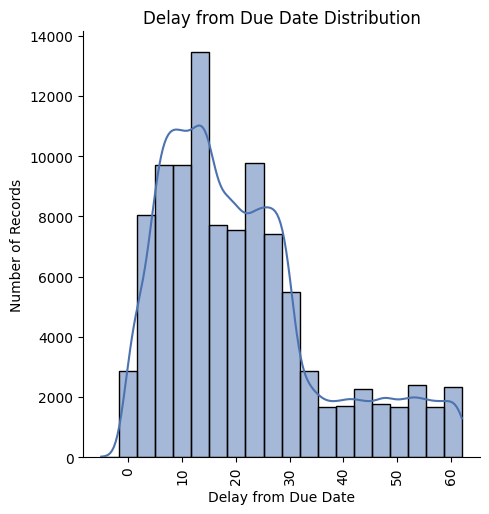

In [24]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_of_Delayed_Payment column

DataType:  object

There are  7002  null values

Number of Unique Values:  749

Distribution of column:

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
4037       1
1571       1
86         1
399        1
3827       1
Name: count, Length: 749, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Existing Min, Max Values:
min      -3.0
max    4397.0
Name: Num_of_Delayed_Payment, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min    -2.0
max    28.0
Name: Num_of_Delayed_Payment, dtype: float64

No. of Unique values after Cleaning: 31

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Delayed Payment Distribution


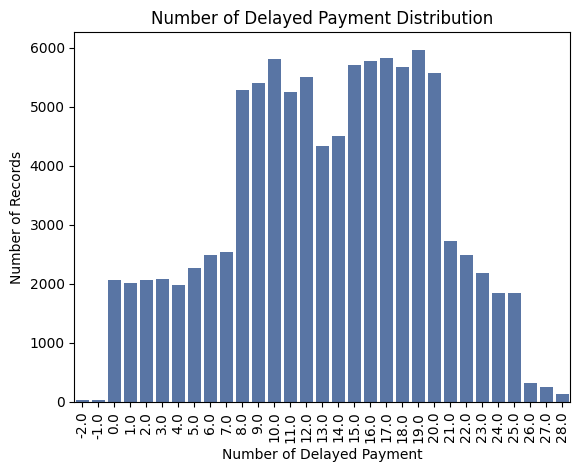

In [25]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4384

Distribution of column:

Changed_Credit_Limit
_                    2091
8.22                  133
11.5                  127
11.32                 126
7.35                  121
                     ... 
30.16                   1
4.710000000000001       1
-4.39                   1
27.38                   1
16.63                   1
Name: count, Length: 4384, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Changed_Credit_Limit is changed to float

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min    -5.01
max    29.98
Name: Changed_Credit_Limit, dtype: float64

No. of Unique values after Cleaning: 3532

No. of Null values after Cleaning: 0

-----------------------------------------------------

Changed Credit Limit Distribution


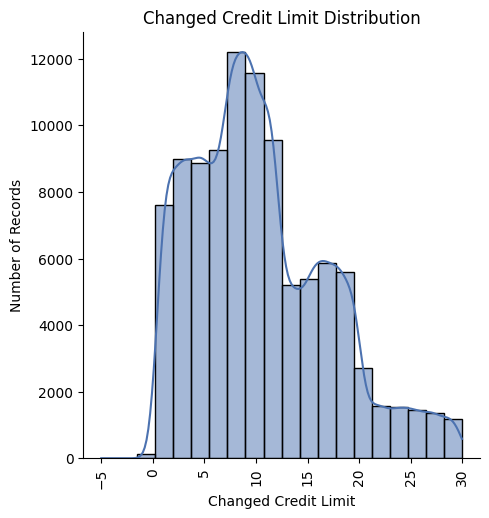

In [26]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float',replace_value='_')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1965  null values

Number of Unique Values:  1223

Distribution of column:

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1618.0        1
758.0         1
735.0         1
2483.0        1
1960.0        1
Name: count, Length: 1223, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

After Cleaning Min, Max Values:
min     0.0
max    17.0
Name: Num_Credit_Inquiries, dtype: float64

No. of Unique values after Cleaning: 18

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Credit Inquiries Distribution


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


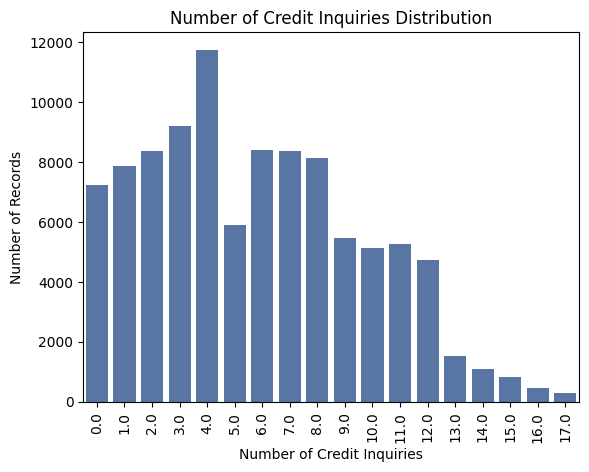

In [27]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  13178

Distribution of column:

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
482.88      16
            ..
494.51_      1
807.65_      1
290.39_      1
2866.5_      1
1283.37_     1
Name: count, Length: 13178, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

No. of Unique values after Cleaning: 12203

No. of Null values after Cleaning: 0

-----------------------------------------------------

Outstanding Debt Distribution


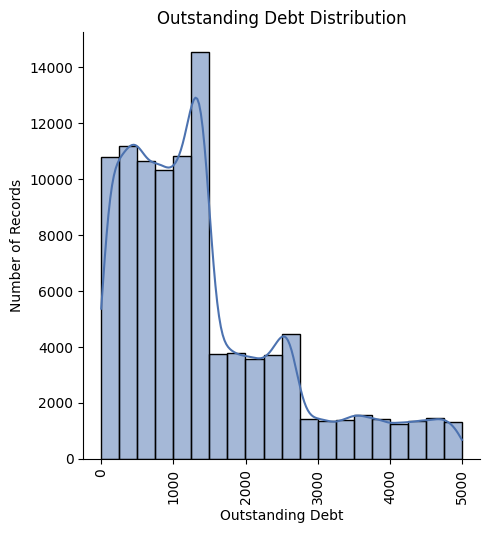

In [28]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

***Credit Utilization Ratio***

* No cleaning is required

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

Credit_Utilization_Ratio
26.822620    1
31.944960    1
28.609352    1
31.377862    1
24.797347    1
            ..
34.663572    1
40.565631    1
41.255522    1
33.638208    1
34.192463    1
Name: count, Length: 100000, dtype: int64

-----------------------------------------------------

Credit Utilization Ratio Distribution


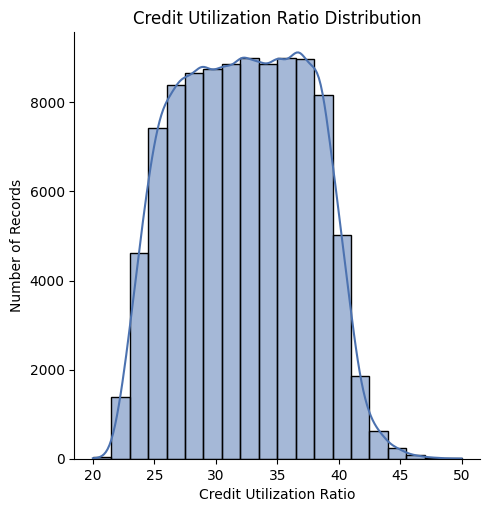

In [29]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

In [30]:
df_train['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [31]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val
    
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

Details of Credit_History_Age column

DataType:  float64

There are  9030  null values

Number of Unique Values:  404

Distribution of column:

Credit_History_Age
191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: count, Length: 404, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Credit_History_Age is changed to <class 'float'>

Existing Min, Max Values:
min      1.0
max    404.0
Name: Credit_History_Age, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min      1.0
max    397.0
Name: Credit_History_Age, dtype: float64

No. of Unique values after Cleaning: 397

No. of Null values after Cleaning: 0

-----------------------------------------------------

Credit History Age Distribution


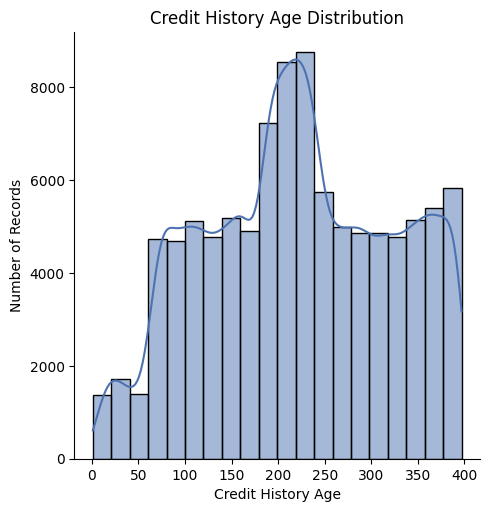

In [32]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  14950

Distribution of column:

Total_EMI_per_month
0.000000        10613
31.086195           8
149.897199          8
62.222285           8
171.430198          8
                ...  
33746.000000        1
39347.000000        1
27292.000000        1
16627.000000        1
49430.000000        1
Name: count, Length: 14950, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min       0.000000
max    1779.103254
Name: Total_EMI_per_month, dtype: float64

No. of Unique values after Cleaning: 11890

No. of Null values after Cleaning: 0

-----------------------------------------------------

Total EMI per month Distribution


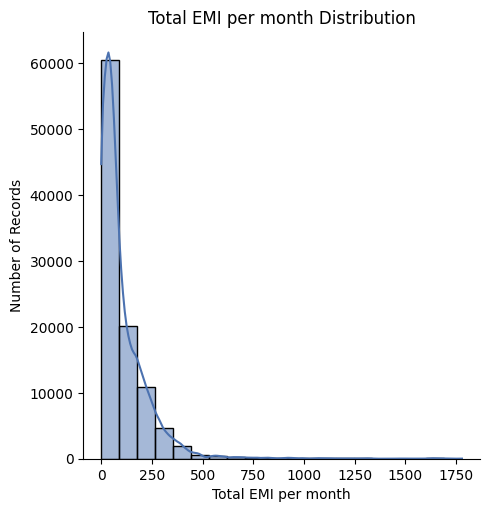

In [33]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name)

Details of Amount_invested_monthly column

DataType:  object

There are  4479  null values

Number of Unique Values:  91049

Distribution of column:

Amount_invested_monthly
__10000__             4305
0.0                    169
167.1638651610451        1
80.41529543900253        1
118.28022162236736       1
                      ... 
215.48638555294247       1
78.49772657092517        1
147.33990786653956       1
82.82557214415213        1
42.935565846112745       1
Name: count, Length: 91049, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

No. of Unique values after Cleaning: 91049

No. of Null values after Cleaning: 0

-----------------------------------------------------

Amount invested monthly Distribution


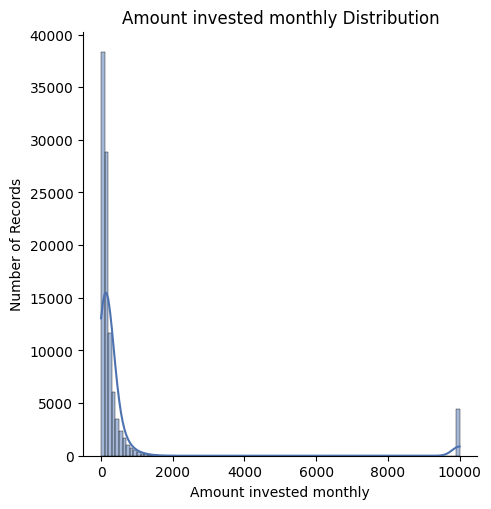

In [34]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float,strip='_')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=100)

Details of Monthly_Balance column

DataType:  object

There are  1200  null values

Number of Unique Values:  98792

Distribution of column:

Monthly_Balance
__-333333333333333333333333333__    9
328.655224                          1
432.559318                          1
470.69062692529184                  1
393.673696                          1
                                   ..
300.008498                          1
396.997157                          1
368.154976                          1
412.669312                          1
895.494583180492                    1
Name: count, Length: 98792, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to <class 'float'>

Existing Min, Max Values:
min       0.007760
max    1602.040519
Name: Monthly_Balance, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min       0.007760
max    1183.930696
Name: Monthly_Balance, dtype: float64

No. of Unique values after Cleaning: 96427

No. of Null values after Cleaning: 0

-----------------------------------------------------

Monthly Balance Distribution


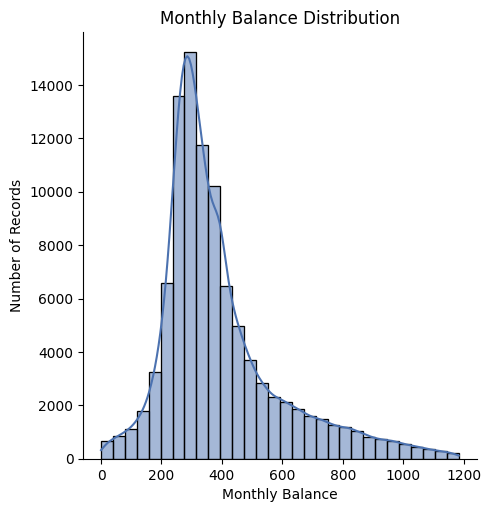

In [35]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Balance'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
df_train[column_name].replace('',np.nan)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=30)

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  434

Distribution of column:

Num_of_Loan
3      14386
2      14250
4      14016
0      10380
1      10083
       ...  
41         1
18         1
56         1
657        1
917        1
Name: count, Length: 434, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Existing Min, Max Values:
min    -100.0
max    1496.0
Name: Num_of_Loan, dtype: float64


C:\Users\sreya\AppData\Local\Temp\ipykernel_10400\2694415105.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



After Cleaning Min, Max Values:
min    0.0
max    9.0
Name: Num_of_Loan, dtype: float64

No. of Unique values after Cleaning: 10

No. of Null values after Cleaning: 0

-----------------------------------------------------

Number of Loan Distribution


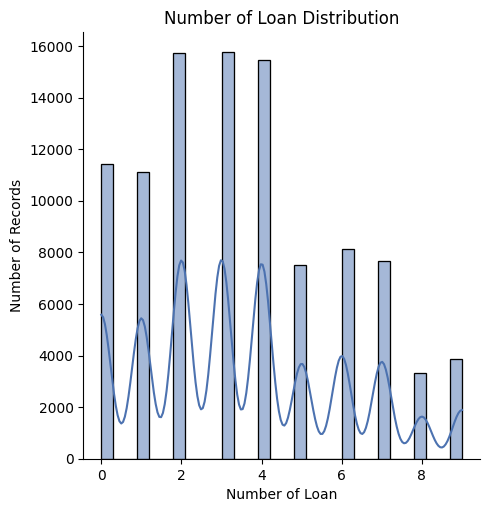

In [36]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_train,column_name,user_friendly_name,bins=30)

In [37]:
#Check if null values are present
df_train.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Data Transformation

In [38]:
#Drop columns
print("Size of Dataset before dropping columns : ",df_train.shape)
drop_columns = ['ID','Customer_ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_train.shape)

Size of Dataset before dropping columns :  (100000, 28)
Size of Dataset after dropping columns :  (100000, 24)


In [40]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

import pickle
encoders = {}

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    encoders[column] = label_encoder

pickle.dump(encoders, open("../models/encoders.pkl", "wb"))


In [46]:
print(df_train.iloc[0])

Month                           1.000000
Age                            23.000000
Occupation                     12.000000
Annual_Income               19114.120000
Monthly_Inhand_Salary        1824.843333
Num_Bank_Accounts               3.000000
Num_Credit_Card                 4.000000
Interest_Rate                   3.000000
Num_of_Loan                     4.000000
Type_of_Loan                  128.000000
Delay_from_due_date             3.000000
Num_of_Delayed_Payment          7.000000
Changed_Credit_Limit           11.270000
Num_Credit_Inquiries            4.000000
Credit_Mix                      1.000000
Outstanding_Debt              809.980000
Credit_Utilization_Ratio       26.822620
Credit_History_Age            265.000000
Payment_of_Min_Amount           1.000000
Total_EMI_per_month            49.574949
Amount_invested_monthly        80.415295
Payment_Behaviour               2.000000
Monthly_Balance               312.494089
Credit_Score                    0.000000
Name: 0, dtype: 

In [ ]:
#Spli Input & Output Data
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']
print(X.shape)
print(y.shape)

In [ ]:
import pickle

FEATURES = X.columns.tolist()

with open("../models/features.pkl", "wb") as f:
    pickle.dump(FEATURES, f)

In [ ]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Model Building

***Approach 1***

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

In [ ]:
# # List of classifiers to test
# classifiers = [
#     ('Decision Tree', DecisionTreeClassifier()),
#     ('Random Forest', RandomForestClassifier()),
#     ('KNN', KNeighborsClassifier(n_neighbors=5)),
#     ('Gaussion NB',GaussianNB()),
#     ('XGB',xgb.XGBClassifier())
# ]

# # Iterate over each classifier and evaluate performance
# for clf_name, clf in classifiers:
#     # Perform cross-validation
#     scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
#     # Calculate average performance metrics
#     avg_accuracy = scores.mean()
#     avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
#     avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
#     # Print the performance metrics
#     print(f'Classifier: {clf_name}')
#     print(f'Average Accuracy: {avg_accuracy:.4f}')
#     print(f'Average Precision: {avg_precision:.4f}')
#     print(f'Average Recall: {avg_recall:.4f}')
#     print('-----------------------')

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

***Approach 2***

In [ ]:
#Handle Imbalance Data
# %pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

### Saving the model

In [ ]:
import pickle
import os

os.makedirs("../models", exist_ok=True)

with open("../models/credit_model.pkl", "wb") as f:
    pickle.dump(rf_classifier, f)

In [ ]:
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

### Testing Data

In [ ]:
test_df = pd.read_csv("../data/test.csv")
test_df.head()

In [ ]:
#Convert Month to datetime object
def parse_month(col):
    # numeric months (1–12) → keep
    if pd.api.types.is_numeric_dtype(col):
        return col

    # mixed strings: "September", "9", "01", etc.
    return pd.to_datetime(
        col,
        format="mixed",
        errors="coerce"
    ).dt.month
if "Month" in test_df.columns:
    test_df["Month"] = parse_month(test_df["Month"])

    # if everything became NaN, fallback to a safe value (e.g., 1)
    if test_df["Month"].isna().all():
        test_df["Month"] = 1
    else:
        test_df["Month"] = test_df["Month"].fillna(
            test_df["Month"].dropna().mode().iloc[0]
        )
  
#Label Encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Loop through each column and apply label encoding
for column in categorical_columns:
    test_df[column] = label_encoder.fit_transform(test_df[column])

column_name = 'Age'
group_by = 'Customer_ID'
#Cleaning
clean_numerical_field(test_df,group_by,column_name,strip='_',datatype='int')

DROP_COLS = ["Customer_ID", "ID", "Name", "SSN"]
test_df = test_df.drop(columns=DROP_COLS, errors="ignore")

X_test = test_df

scaler = pickle.load(open("../models/scaler.pkl", "rb"))
X_test_scaled = scaler.transform(X_test)

model = pickle.load(open("../models/credit_model.pkl", "rb"))

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

test_df["predicted_credit_status"] = y_pred
test_df["default_probability"] = y_prob

test_df.head()